In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score


In [84]:
heart = pd.read_csv('heart.csv')
o2 = pd.read_csv('o2Saturation.csv')

In [85]:
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [86]:
o2

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [87]:
# # Pairplot
# plt.figure(figsize=(10, 10))
# sns.pairplot(heart)
# plt.show()

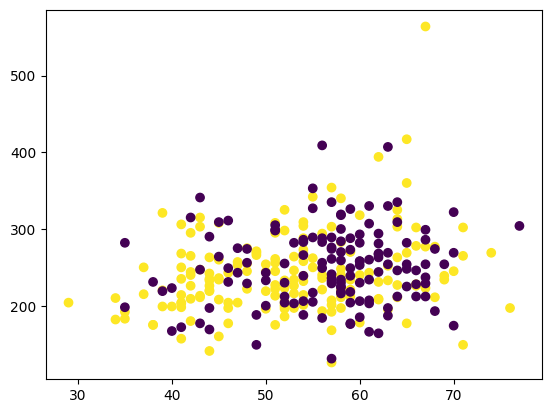

In [88]:
plt.scatter(heart['age'], heart['chol'], c=heart['output'])
plt.show()


In [89]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [90]:
heart.duplicated().sum()

1

In [91]:
heart = heart.drop_duplicates()

In [92]:
heart.duplicated().sum()

0

In [93]:
correlations = heart[:-1].corr()

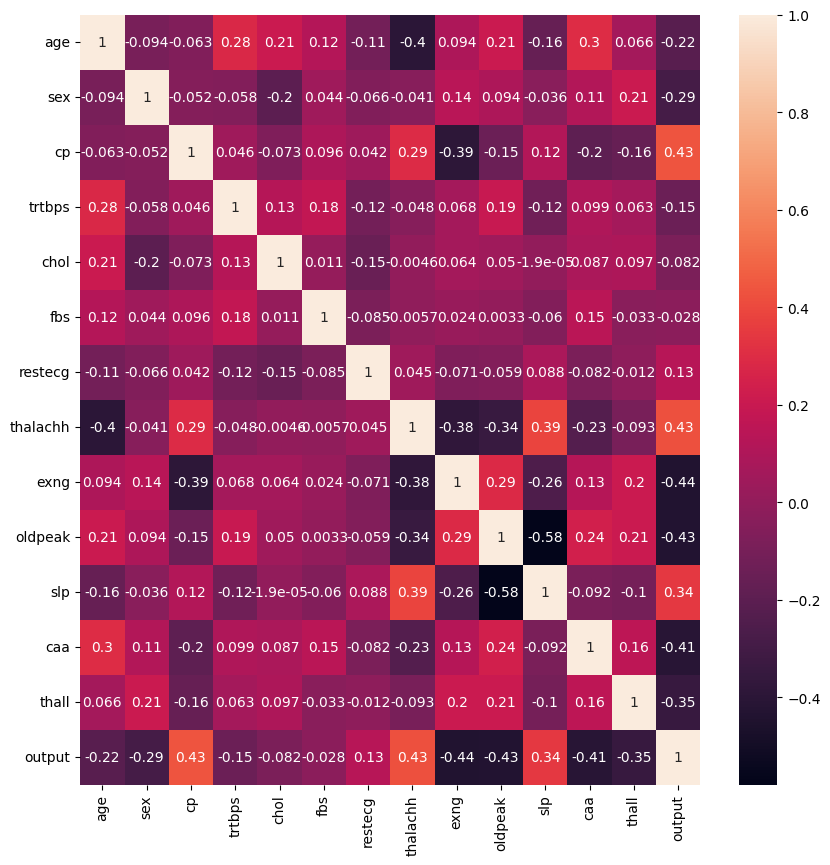

In [94]:
# prompt: display correltaion matrix

plt.figure(figsize=(10, 10))
sns.heatmap(correlations, annot=True)
plt.show()


In [95]:
heart['cp'].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

In [96]:
heart['thalachh'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [97]:
heart['thalachh'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [98]:
correlations

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.093921,-0.063149,0.283250,0.207451,0.119940,-0.110839,-0.397056,0.093967,0.207200,-0.163647,0.302076,0.065843,-0.220908
sex,-0.093921,1.000000,-0.051752,-0.058301,-0.197278,0.044156,-0.065573,-0.041465,0.140677,0.094408,-0.036287,0.114848,0.209792,-0.290524
cp,-0.063149,-0.051752,1.000000,0.046498,-0.072663,0.096095,0.041749,0.293799,-0.393175,-0.146784,0.117011,-0.195415,-0.160380,0.433064
trtbps,0.283250,-0.058301,0.046498,1.000000,0.125205,0.178052,-0.115866,-0.047790,0.068371,0.194591,-0.123156,0.099348,0.062742,-0.146892
chol,0.207451,-0.197278,-0.072663,0.125205,1.000000,0.011150,-0.148537,-0.004596,0.063683,0.049549,-0.000019,0.087084,0.096512,-0.082342
fbs,0.119940,0.044156,0.096095,0.178052,0.011150,1.000000,-0.084641,-0.005696,0.023784,0.003269,-0.059610,0.145385,-0.033491,-0.028406
restecg,-0.110839,-0.065573,0.041749,-0.115866,-0.148537,-0.084641,1.000000,0.044929,-0.071309,-0.059426,0.088460,-0.082328,-0.012211,0.131723
thalachh,-0.397056,-0.041465,0.293799,-0.047790,-0.004596,-0.005696,0.044929,1.000000,-0.375950,-0.340110,0.388052,-0.229771,-0.093303,0.425471
exng,0.093967,0.140677,-0.393175,0.068371,0.063683,0.023784,-0.071309,-0.375950,1.000000,0.285294,-0.257992,0.126145,0.204889,-0.439354
oldpeak,0.207200,0.094408,-0.146784,0.194591,0.049549,0.003269,-0.059426,-0.340110,0.285294,1.000000,-0.579425,0.237748,0.207925,-0.433843


In [99]:
correlations[(correlations['output'] <= -0.3) | (correlations['output'] >= 0.3)]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
cp,-0.063149,-0.051752,1.000000,0.046498,-0.072663,0.096095,0.041749,0.293799,-0.393175,-0.146784,0.117011,-0.195415,-0.160380,0.433064
thalachh,-0.397056,-0.041465,0.293799,-0.047790,-0.004596,-0.005696,0.044929,1.000000,-0.375950,-0.340110,0.388052,-0.229771,-0.093303,0.425471
exng,0.093967,0.140677,-0.393175,0.068371,0.063683,0.023784,-0.071309,-0.375950,1.000000,0.285294,-0.257992,0.126145,0.204889,-0.439354
oldpeak,0.207200,0.094408,-0.146784,0.194591,0.049549,0.003269,-0.059426,-0.340110,0.285294,1.000000,-0.579425,0.237748,0.207925,-0.433843
slp,-0.163647,-0.036287,0.117011,-0.123156,-0.000019,-0.059610,0.088460,0.388052,-0.257992,-0.579425,1.000000,-0.091711,-0.104535,0.342514
caa,0.302076,0.114848,-0.195415,0.099348,0.087084,0.145385,-0.082328,-0.229771,0.126145,0.237748,-0.091711,1.000000,0.160655,-0.408839
thall,0.065843,0.209792,-0.160380,0.062742,0.096512,-0.033491,-0.012211,-0.093303,0.204889,0.207925,-0.104535,0.160655,1.000000,-0.345797
output,-0.220908,-0.290524,0.433064,-0.146892,-0.082342,-0.028406,0.131723,0.425471,-0.439354,-0.433843,0.342514,-0.408839,-0.345797,1.000000


In [100]:
corr_1 = correlations[(correlations['output'] <= -0.3) | (correlations['output'] >= 0.3)]
filtered_columns = corr_1.index

In [101]:
filtered_columns

Index(['cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'], dtype='object')

In [102]:
filtered_heart_data = heart[filtered_columns]
filtered_heart_data

,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,3,150,0,2.3,0,0,1,1
1,2,187,0,3.5,0,0,2,1
2,1,172,0,1.4,2,0,2,1
3,1,178,0,0.8,2,0,2,1
4,0,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...
298,0,123,1,0.2,1,0,3,0
299,3,132,0,1.2,1,0,3,0
300,0,141,0,3.4,1,2,3,0
301,0,115,1,1.2,1,1,3,0


In [103]:
data = filtered_heart_data.iloc[:, :-1]
target = filtered_heart_data["output"]

In [104]:
data[data.columns] = StandardScaler().fit_transform(data)

In [105]:



X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=target                                                  
                                                    )

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(241, 7)
(241,)
(61, 7)
(61,)


In [106]:
data

,cp,thalachh,exng,oldpeak,slp,caa,thall
0,1.976470,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-2.147955
1,1.005911,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.513994
2,0.035352,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.513994
3,0.035352,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.513994
4,-0.935208,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994
...,...,...,...,...,...,...,...
298,-0.935208,-1.161988,1.431958,-0.727060,-0.645834,-0.714911,1.119967
299,1.976470,-0.768384,-0.698344,0.135360,-0.645834,-0.714911,1.119967
300,-0.935208,-0.374779,-0.698344,2.032684,-0.645834,1.274980,1.119967
301,-0.935208,-1.511859,1.431958,0.135360,-0.645834,0.280034,1.119967


In [107]:
ID3 = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)

ID3.fit(X_train, y_train)

y_pred = ID3.predict(X_test)

print("F1_score", f1_score(y_test, y_pred))

F1_score 0.7837837837837839


In [108]:
pp = make_pipeline(StandardScaler())

In [109]:
ID3 = GridSearchCV(DecisionTreeClassifier(), {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': range(1,15),
        'min_samples_split': range(2,15),
    },
    cv = 5, scoring='f1')

ID3.fit(X_train, y_train)
ID3.best_params_

{'criterion': 'log_loss', 'max_depth': 6, 'min_samples_split': 10}

In [110]:
best_ID3 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_split=  5)
cross_val_score(best_ID3, X_test, y_test, scoring='f1').mean()

0.657121212121212

In [111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 59 to 149
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cp        241 non-null    float64
 1   thalachh  241 non-null    float64
 2   exng      241 non-null    float64
 3   oldpeak   241 non-null    float64
 4   slp       241 non-null    float64
 5   caa       241 non-null    float64
 6   thall     241 non-null    float64
dtypes: float64(7)
memory usage: 15.1 KB


In [112]:
KNN = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': range(1,10),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
})

KNN.fit(X_train, y_train)
KNN.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 6,
 'weights': 'uniform'}

In [113]:
best_KNN = KNeighborsClassifier(**KNN.best_params_)
cross_val_score(best_KNN, X_test, y_test, scoring = 'f1').mean()

0.7509523809523809

In [114]:
logistic_regression = GridSearchCV(LogisticRegression(), {
  'penalty': ['l1', 'l2', 'elasticnet', None],
  'C' : np.linspace(0.0000000001, 1, 20, endpoint=True),
  'max_iter': range(50,150, 10),
})

logistic_regression.fit(X_train, y_train)
logistic_regression.best_params_

C:\Users\karen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\karen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\karen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\karen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1193: UserW

In [115]:
logistic_regression = LogisticRegression(**logistic_regression.best_params_)
cross_val_score(logistic_regression, X_test, y_test, scoring = 'f1').mean()

0.8326912303382892

In [116]:
X = heart.iloc[:, :-1]
y = heart["output"]

In [117]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [118]:
X[X.columns] = StandardScaler().fit_transform(X)

In [119]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.949794,0.682656,1.976470,0.764066,-0.261285,2.389793,-1.002541,0.018826,-0.698344,1.084022,-2.271182,-0.714911,-2.147955
1,-1.928548,0.682656,1.005911,-0.091401,0.067741,-0.418446,0.901657,1.636979,-0.698344,2.118926,-2.271182,-0.714911,-0.513994
2,-1.485726,-1.464866,0.035352,-0.091401,-0.822564,-0.418446,-1.002541,0.980971,-0.698344,0.307844,0.979514,-0.714911,-0.513994
3,0.174856,0.682656,0.035352,-0.661712,-0.203222,-0.418446,0.901657,1.243374,-0.698344,-0.209608,0.979514,-0.714911,-0.513994
4,0.285561,-1.464866,-0.935208,-0.661712,2.080602,-0.418446,0.901657,0.587366,1.431958,-0.382092,0.979514,-0.714911,-0.513994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,-1.464866,-0.935208,0.478910,-0.106449,-0.418446,0.901657,-1.161988,1.431958,-0.727060,-0.645834,-0.714911,1.119967
299,-1.042904,0.682656,1.976470,-1.232023,0.338703,-0.418446,0.901657,-0.768384,-0.698344,0.135360,-0.645834,-0.714911,1.119967
300,1.503322,0.682656,-0.935208,0.707035,-1.035462,2.389793,0.901657,-0.374779,-0.698344,2.032684,-0.645834,1.274980,1.119967
301,0.285561,0.682656,-0.935208,-0.091401,-2.235438,-0.418446,0.901657,-1.511859,1.431958,0.135360,-0.645834,0.280034,1.119967


In [122]:
def forward_selection(Model):
    columns = []
    score = 0
    while(True):
        new_score = score
        col = []
        for i in X_train.columns:
            if i in columns:
                continue
            score_ = cross_val_score(Model, X[columns + [i]], y, scoring = 'f1').mean()
            if(new_score < score_):
                new_score = score_
                col = [i]
            print(columns + [i], score_)
        
        if new_score - score > 0.01:
            columns.append(col[0])
            score = new_score
        else:
            break
    
    print(score, columns)


In [123]:
forward_selection(KNeighborsClassifier())

['cp'] 0.6968007034135962
['thalachh'] 0.6953252860887291
['exng'] 0.7038524663543314
['oldpeak'] 0.7229138350234241
['slp'] 0.7038524663543314
['caa'] 0.7395463974545818
['thall'] 0.7012047122172157
['caa', 'cp'] 0.8175705645705647
['caa', 'thalachh'] 0.7495132883025062
['caa', 'exng'] 0.7437517511908097
['caa', 'oldpeak'] 0.7771357156865604
['caa', 'slp'] 0.7754588970411525
['caa', 'thall'] 0.7638287174834512
['caa', 'cp', 'thalachh'] 0.8096877662095053
['caa', 'cp', 'exng'] 0.803065233952901
['caa', 'cp', 'oldpeak'] 0.8191681032486479
['caa', 'cp', 'slp'] 0.8338468436187905
['caa', 'cp', 'thall'] 0.8290873330318252
['caa', 'cp', 'slp', 'thalachh'] 0.8187143160039589
['caa', 'cp', 'slp', 'exng'] 0.8155973805047132
['caa', 'cp', 'slp', 'oldpeak'] 0.8446915831327658
['caa', 'cp', 'slp', 'thall'] 0.8559916863350168
['caa', 'cp', 'slp', 'thall', 'thalachh'] 0.8338652165412729
['caa', 'cp', 'slp', 'thall', 'exng'] 0.8565399077132252
['caa', 'cp', 'slp', 'thall', 'oldpeak'] 0.8502978894348

In [121]:
forward_selection(LogisticRegression())

['cp'] 0.7739219114219114
['thalachh'] 0.7400626777369677
['exng'] 0.7678775284222455
['oldpeak'] 0.730955997939261
['slp'] 0.6939989759344598
['caa'] 0.7663100035268604
['thall'] 0.7796984938336584
['thall', 'cp'] 0.7531286587808328
['thall', 'thalachh'] 0.7496310452832191
['thall', 'exng'] 0.7498767228017502
['thall', 'oldpeak'] 0.7743256641677058
['thall', 'slp'] 0.7636891171993911
['thall', 'caa'] 0.7661511901411282
0.7796984938336584 ['thall']


In [124]:
forward_selection(DecisionTreeClassifier())

['cp'] 0.7739219114219114
['thalachh'] 0.6107833444462327
['exng'] 0.7678775284222455
['oldpeak'] 0.7208305618021857
['slp'] 0.6852558065355527
['caa'] 0.767738055440846
['thall'] 0.7830830427201395
['thall', 'cp'] 0.7678115666377814
['thall', 'thalachh'] 0.7081208271831234
['thall', 'exng'] 0.747150427738663
['thall', 'oldpeak'] 0.7385273631840796
['thall', 'slp'] 0.7816057699928669
['thall', 'caa'] 0.7967527682339768
['thall', 'caa', 'cp'] 0.845027195027195
['thall', 'caa', 'thalachh'] 0.7628876374656972
['thall', 'caa', 'exng'] 0.8513716535990996
['thall', 'caa', 'oldpeak'] 0.7903773703944048
['thall', 'caa', 'slp'] 0.8301705984145767
['thall', 'caa', 'exng', 'cp'] 0.8298443223443224
['thall', 'caa', 'exng', 'thalachh'] 0.7791122602887308
['thall', 'caa', 'exng', 'oldpeak'] 0.760374262395363
['thall', 'caa', 'exng', 'slp'] 0.8188640792770177
0.8513716535990996 ['thall', 'caa', 'exng']


In [125]:
from sklearn.feature_selection import SequentialFeatureSelector
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
sfs = SequentialFeatureSelector(pipeline, scoring='f1', n_features_to_select='auto', tol=0.001, cv=5)
sfs.fit(data, target)
sfs.get_support()
# sfs.transform(data)
data.iloc[:, sfs.get_support()]

,thall
0,-2.147955
1,-0.513994
2,-0.513994
3,-0.513994
4,-0.513994
...,...
298,1.119967
299,1.119967
300,1.119967
301,1.119967


In [127]:
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
sfs = SequentialFeatureSelector(pipeline, scoring='f1', n_features_to_select='auto', tol=0.001, cv=5)
sfs.fit(data, target)
sfs.get_support()
# sfs.transform(data)
data.iloc[:, sfs.get_support()]

,cp,slp,caa,thall
0,1.976470,-2.271182,-0.714911,-2.147955
1,1.005911,-2.271182,-0.714911,-0.513994
2,0.035352,0.979514,-0.714911,-0.513994
3,0.035352,0.979514,-0.714911,-0.513994
4,-0.935208,0.979514,-0.714911,-0.513994
...,...,...,...,...
298,-0.935208,-0.645834,-0.714911,1.119967
299,1.976470,-0.645834,-0.714911,1.119967
300,-0.935208,-0.645834,1.274980,1.119967
301,-0.935208,-0.645834,0.280034,1.119967


In [128]:
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier())
sfs = SequentialFeatureSelector(pipeline, scoring='f1', n_features_to_select='auto', tol=0.001, cv=5)
sfs.fit(data, target)
sfs.get_support()
# sfs.transform(data)
data.iloc[:, sfs.get_support()]

,exng,caa,thall
0,-0.698344,-0.714911,-2.147955
1,-0.698344,-0.714911,-0.513994
2,-0.698344,-0.714911,-0.513994
3,-0.698344,-0.714911,-0.513994
4,1.431958,-0.714911,-0.513994
...,...,...,...
298,1.431958,-0.714911,1.119967
299,-0.698344,-0.714911,1.119967
300,-0.698344,1.274980,1.119967
301,1.431958,0.280034,1.119967
